#Are Referring domains correlated to Social media shares?
We are given a Dataset of 1475 rows and their are 10 Categories Finance, Medical, Food, Movies, Design, Photography, Education, Business, Photography, Gaming and Blogging.

In [270]:
import pandas as pd
df=pd.read_csv("content4.csv",encoding='utf-16',sep="\t")
df.head()

,#,Content Title,Content URL,Author,Domain Rating,Referring Domains,Traffic,Traffic Value,Twitter shares,Facebook shares,Pinterest shares,Date,Number of Words,HTTP code,Republished date
0,1,Slack’s Epic Marketing Strategy and Stewart Bu...,https://medium.com/the-mission/slacks-epic-mar...,Ian Faison,93,34,8,364,6,18,2,11/22/2017 19:19,881,200,3/4/2018 7:42
1,2,Cisco HyperFlex HCI named a Leader in the new ...,https://blogs.cisco.com/datacenter/cisco-hyper...,Vijay Venugopal,91,12,7,327,2,87,0,12/11/2019 13:00,1378,NXDOMAIN,NaN
2,3,Roulette machines: the crack cocaine of gambling,https://www.theguardian.com/uk/2013/may/27/rou...,Amelia Gentleman,93,23,8,312,2,35,3,5/27/2013 6:00,3359,200,NaN
3,4,Have Private Clouds Finally Found Their Place ...,https://www.forbes.com/sites/jasonbloomberg/20...,Jason Bloomberg,93,27,7,265,44,50,1,2/2/2019 17:34,931,200,NaN
4,5,Signez la pétition,https://www.change.org/p/hillary-clinton-suppo...,NaN,91,0,7,265,0,13,0,10/28/2017 23:41,786,200,NaN


In [271]:
df.shape

(1475, 15)

It is having 14 Columns 'Content Title', 'Content URL', 'Author', 'Domain Rating', 'Referring Domains', 'Traffic', 'Traffic Value', 'Twitter shares', 'Facebook shares', 'Pinterest shares', 'Date', 'Number of Words', 'HTTP code', 'Republished date'.
We have to find **Corelation between Referring Domains and Total Shares**.
It is containing 3 shares and we will add up all these to get a new column **Total Shares**.

In [272]:
type(df['Domain Rating'][0])
type(df['Twitter shares'][0])# Checking the type of columns whether string or Int to perform addition operation.

numpy.int64

In [0]:
df["Total Shares"]=df['Twitter shares']+df['Pinterest shares']+df['Facebook shares']

Let's make a plot of these columns and try to have a look.

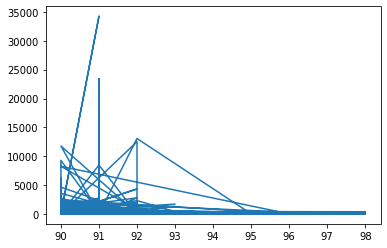

In [274]:
import matplotlib.pyplot as plt
plt.plot(df['Domain Rating'], df["Total Shares"])

It doesn't give any idea. Let's try to look at the correlation of the whole dataset.

In [275]:
df['Referring Domains'].corr(df['Total Shares'],method ='pearson') 

0.08491290917725118

It is showing a little Correaltion, but there can be more hidden patterns in this Data. 
Let's Find out

To Do so, we have to categorize all the domains to their respective categories.

We will use **K means** Clustering algorithm.

#Importing Libraries

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
import nltk
import string
from nltk.tokenize import word_tokenize
from sklearn.utils import shuffle

To categorize we will take help of Content Title column

Steps:
1. First we will Apply Kmeans clustering to Content title column using tf_idf vectors into 10 clusters.
2. We will get features of all the 10 clusters and make 10 individual lists containing words of same cluster.

3. For each cluster we will check find the rows containg the words in those clusters and sepeartely store them.

4. We will find the Corelation of each cluster and with its respective shares.

In [0]:
# Making Tf_IDF vectors
data=df['Content Title']
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english')
tf_idf = tf_idf_vectorizor.fit_transform(data)


In [279]:
# Clustering
true_k = 10 # Our final number of categories
model = KMeans(n_clusters=true_k, max_iter=1000)
model.fit(tf_idf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [280]:
# making 10 clusters each of different category and retrieving the words from Features
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tf_idf_vectorizor.get_feature_names()
clusters={"0":[],"1":[],"2":[],"3":[],"4":[],"5":[],"6":[],"7":[],"8":[],"9":[]}
true_k=model.n_clusters
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :]:
        clusters[str(i)].append(terms[ind])
    

Cluster 0:
Cluster 1:
Cluster 2:
Cluster 3:
Cluster 4:
Cluster 5:
Cluster 6:
Cluster 7:
Cluster 8:
Cluster 9:


In [281]:
print(clusters['0'])
print(clusters['1'])

['video', 'things', 'home', '10', 'city', 'blog', 'man', 'war', 'story', 'power', 'time', '2019', 'beat', 'school', 'rock', 'film', 'wiki', 'day', 'weather', 'theory', 'does', 'mother', 'high', 'theme', 'guide', 'meet', 'project', 'life', 'radio', 'black', 'way', 'security', 'state', 'news', 'kids', 'real', 'live', 'therapy', 'secret', 'changes', 'god', 'office', 'people', 'difference', 'law', 'morning', 'art', 'single', 'ones', 'wind', 'wrong', 'red', 'coming', 'science', 'com', 'cloud', 'data', 'eye', 'study', 'long', '93', 'review', 'space', 'international', 'ep', 'night', 'microsoft', 'sun', 'today', 'web', 'journal', 'artists', 'theft', 'blood', 'set', 'beauty', 'years', 'game', 'song', '94', 'right', 'lost', 'northern', 'know', 'tax', 'mind', 'dead', 'apple', 'gallery', 'internet', 'authentication', 'sports', 'help', 'rose', 'tracks', 'field', 'album', 'code', 'matthew', 'wall', 'health', 'birthday', 'service', 'azure', 'blue', '2017', 'cost', 'perfect', 'says', 'coronavirus', 's

Right Now we don't know which cluster belongs to which category.
To find that we will have a look on the domains having words in each cluster

In [0]:
cluster0=pd.Series(clusters['0'])
cluster1=pd.Series(clusters['1'])
cluster2=pd.Series(clusters['2'])
cluster3=pd.Series(clusters['3'])
cluster4=pd.Series(clusters['4'])
cluster5=pd.Series(clusters['5'])
cluster6=pd.Series(clusters['6'])
cluster7=pd.Series(clusters['7'])
cluster8=pd.Series(clusters['8'])
cluster9=pd.Series(clusters['9'])

#Cluster0

In [0]:
indexes0=[]
for i in cluster0:
  cluster_df0=df[df['Content Title'].str.contains(i)]
  if cluster_df0.shape[0]>300:
    for j in cluster_df0.index:
      indexes0.append(j)
indexes0=set(indexes0)
cluster0_df=df.loc[indexes0,:]

Now, We will label this Cluster

In [284]:
cluster0_df=shuffle(cluster0_df)
cluster0_df['Content URL'].head(10)

322     https://statmodeling.stat.columbia.edu/2020/03...
1460    https://motherfalconmusic.bandcamp.com/album/y...
61      https://www.theatlantic.com/education/archive/...
255     https://auto.howstuffworks.com/under-the-hood/...
155     https://www.iheart.com/content/2019-08-29-shir...
1039    https://sprots.bigcartel.com/product/reach-for...
1350    https://www.offset.com/artist/Daniel+Featherstone
967     https://au.finance.yahoo.com/news/experts-pred...
494     https://www.continuum.umn.edu/event/gotta-minu...
75      https://www.buzzfeed.com/daves4/people-who-thi...
Name: Content URL, dtype: object

Cluster0 is **Finance**

In [285]:
cluster0_df['Referring Domains'].corr(cluster0_df['Total Shares'])

0.08057774279135071

Similarly we will get others

#Cluster1

In [0]:
indexes1=[]
for i in cluster1:
  cluster_df1=df[df['Content Title'].str.contains(i)]
  if cluster_df1.shape[0]>300:
    for j in cluster_df1.index:
      indexes1.append(j)
indexes1=set(indexes1)
cluster1_df=df.loc[indexes1,:]

Now, we will label Cluster1

In [287]:
cluster1_df=shuffle(cluster1_df)
cluster1_df['Content URL'].head(10)

272     https://wpastra.com/how-to-choose-a-wordpress-...
228     https://www.pinterest.com/themitzvahbowl/mitzv...
322     https://statmodeling.stat.columbia.edu/2020/03...
1160    https://lakuta.bandcamp.com/album/brothers-sis...
47      https://www.smh.com.au/business/companies/anot...
551     https://rock1053.iheart.com/featured/thor/cont...
144     https://blogs.scientificamerican.com/plugged-i...
914     https://www.bennettinstitute.cam.ac.uk/blog/co...
1195    https://ythelastman.fandom.com/wiki/Y:_The_Las...
136     https://theblog.adobe.com/personalization-tren...
Name: Content URL, dtype: object

Cluster1 is **Photography**

In [289]:
print("Correlation is", cluster1_df['Referring Domains'].corr(cluster1_df['Total Shares']))

Correlation is 0.080577742791351


#Cluster2

In [0]:
indexes2=[]
for i in cluster2:
  cluster_df2=df[df['Content Title'].str.contains(i)]
  if cluster_df2.shape[0]>300:
    for j in cluster_df2.index:
      indexes2.append(j)
indexes2=set(indexes2)
cluster2_df=df.loc[indexes2,:]

Now, we will label cluster2

In [293]:
cluster2_df=shuffle(cluster2_df)
cluster2_df['Content URL'].head(10)

624     https://power99.iheart.com/featured/the-rise-g...
702     https://profiles.forbes.com/members/finance/pr...
384     https://samsarabluesexperiment.bandcamp.com/al...
462     http://webtv.un.org/watch/the-situation-in-mal...
1455    https://theruinsofbeverast.bandcamp.com/album/...
190     https://ed.ted.com/lessons/how-do-drugs-affect...
1074    https://real1039.iheart.com/featured/vegas-gol...
501     https://thecasualsexists.bandcamp.com/album/wh...
944     https://genealogy.stackexchange.com/questions/...
781     https://www.washington.edu/news/2020/01/15/the...
Name: Content URL, dtype: object

Cluster2 is **Medical**

In [295]:
print("Correlation is", cluster2_df['Referring Domains'].corr(cluster2_df['Total Shares']))

Correlation is 0.08057774279135071


#Cluster3

In [0]:
indexes3=[]
for i in cluster3:
  cluster_df3=df[df['Content Title'].str.contains(i)]
  if cluster_df3.shape[0]>300:
    for j in cluster_df3.index:
      indexes3.append(j)
indexes3=set(indexes3)
cluster3_df=df.loc[indexes3,:]

Now, we will label cluster3

In [298]:
cluster3_df=shuffle(cluster3_df)
cluster3_df['Content URL'].head(10)

748     https://www.extension.harvard.edu/professional...
1027    https://subgenius.fandom.com/wiki/Advanced_Sup...
1026    https://photogallery.indiatimes.com/celebs/cel...
502     https://www.rubio.senate.gov/public/index.cfm/...
917     https://austin.eater.com/2019/11/11/20955417/b...
133     https://www.wired.com/2017/03/no-iphones-arent...
1102    https://939litefm.iheart.com/featured/mick-lee...
750     https://montreal.eater.com/2019/5/7/18535327/m...
543     https://www.journals.elsevier.com/the-journal-...
147     https://www.timeout.com/london/film/the-surviv...
Name: Content URL, dtype: object

Cluster2 is **Design**

In [299]:
print("Correlation is", cluster3_df['Referring Domains'].corr(cluster3_df['Total Shares']))

Correlation is 0.08057774279135069


#Cluster4

In [0]:
indexes4=[]
for i in cluster4:
  cluster_df4=df[df['Content Title'].str.contains(i)]
  if cluster_df4.shape[0]>300:
    for j in cluster_df4.index:
      indexes4.append(j)
indexes4=set(indexes4)
cluster4_df=df.loc[indexes4,:]

Now, we will label cluster4

In [301]:
cluster4_df=shuffle(cluster4_df)
cluster4_df['Content URL'].head(10)

462     http://webtv.un.org/watch/the-situation-in-mal...
798     https://sg.news.yahoo.com/saf-officer-charged-...
68      https://www.today.com/video/fancy-wine-vs-wine...
560     https://www.purdue.edu/newsroom/releases/2019/...
847     https://tech.economictimes.indiatimes.com/news...
1158          https://www.youtube.com/watch?v=5ykThEZLP8A
156     https://www.blogs.va.gov/VAntage/50303/protect...
97      https://www.cbsnews.com/video/when-a-falling-l...
802     https://redwall.fandom.com/wiki/Redwall_AbbeyC...
210     https://www.bluehost.com/blog/wordpress/how-to...
Name: Content URL, dtype: object

Cluster4 is **Business**

In [303]:
print("Correlation is", cluster4_df['Referring Domains'].corr(cluster4_df['Total Shares']))

Correlation is 0.0805777427913508


#Cluster5

In [0]:
indexes5=[]
for i in cluster5:
  cluster_df5=df[df['Content Title'].str.contains(i)]
  if cluster_df5.shape[0]>300:
    for j in cluster_df5.index:
      indexes5.append(j)
indexes5=set(indexes5)
cluster5_df=df.loc[indexes5,:]

Now, we will label cluster5

In [306]:
cluster5_df=shuffle(cluster5_df)
cluster5_df['Content URL'].head(10)

3       https://www.forbes.com/sites/jasonbloomberg/20...
374     https://shadowhunters.fandom.com/wiki/The_Shad...
1063    https://saidthewhale.bandcamp.com/album/little...
579        https://theatredance.utexas.edu/event/crucible
214     https://kprcradio.iheart.com/featured/the-purs...
1299    http://leagueoflegends.wikia.com/wiki/The_Jour...
547     https://money.stackexchange.com/questions/8556...
402     https://scripps.ucsd.edu/news/research-highlig...
202     https://download.cnet.com/Secret-Guide-2-How-t...
1373    https://german.stackexchange.com/questions/396...
Name: Content URL, dtype: object

Cluster5 is **Gaming**

In [308]:
print("Correlation is", cluster5_df['Referring Domains'].corr(cluster5_df['Total Shares']))

Correlation is 0.08057774279135094


#Cluster6

In [0]:
indexes6=[]
for i in cluster6:
  cluster_df6=df[df['Content Title'].str.contains(i)]
  if cluster_df6.shape[0]>300:
    for j in cluster_df6.index:
      indexes6.append(j)
indexes6=set(indexes6)
cluster6_df=df.loc[indexes6,:]

Now, we will label cluster6

In [310]:
cluster6_df=shuffle(cluster6_df)
cluster6_df['Content URL'].head(10)

1368    https://cardfight.fandom.com/wiki/Bernard_the_...
1092    https://kiisfm.iheart.com/featured/letty-b/con...
1218    https://gis.stackexchange.com/questions/108973...
54      https://blogs.oracle.com/cloud-infrastructure/...
1451    https://www.podbean.com/podcast-detail/m8ji3-5...
1033    http://blog.dvd.netflix.com/new-dvd-releases/t...
852     https://theportersgate.bandcamp.com/track/have...
236     https://in.mashable.com/science/7515/internati...
507     https://lyrics.fandom.com/wiki/Michael_Jackson...
373     https://921thebeat.iheart.com/contests/enter-t...
Name: Content URL, dtype: object

Cluster6 is **Blogging**

In [311]:
print("Correlation is", cluster6_df['Referring Domains'].corr(cluster6_df['Total Shares']))

Correlation is 0.08057774279135084


#Cluster7

In [0]:
indexes7=[]
for i in cluster7:
  cluster_df7=df[df['Content Title'].str.contains(i)]
  if cluster_df7.shape[0]>300:
    for j in cluster_df7.index:
      indexes7.append(j)
indexes7=set(indexes7)
cluster7_df=df.loc[indexes7,:]

Now, we will label cluster7

In [313]:
cluster7_df=shuffle(cluster7_df)
cluster7_df['Content URL'].head(10)

1019    https://thecompound.bandcamp.com/album/break-t...
852     https://theportersgate.bandcamp.com/track/have...
1274    https://michellezauner.bandcamp.com/track/the-...
797     https://video.vice.com/en_us/video/winners-and...
771     https://www.pca.state.mn.us/living-green/recyc...
690     https://vegas.eater.com/2017/3/6/14824690/firs...
173     https://io9.gizmodo.com/what-is-the-worst-kind...
556      https://sitequeeste.bandcamp.com/album/the-flash
265     https://nola.eater.com/2018/12/28/18159522/new...
1046    https://ulver.bandcamp.com/album/themes-from-w...
Name: Content URL, dtype: object

Cluster7 is **Food**

In [314]:
print("Correlation is", cluster7_df['Referring Domains'].corr(cluster7_df['Total Shares']))

Correlation is 0.08057774279135067


#Cluster8

In [0]:
indexes8=[]
for i in cluster8:
  cluster_df8=df[df['Content Title'].str.contains(i)]
  if cluster_df8.shape[0]>300:
    for j in cluster_df8.index:
      indexes8.append(j)
indexes8=set(indexes8)
cluster8_df=df.loc[indexes8,:]

Now, we will label cluster8

In [318]:
cluster8_df=shuffle(cluster8_df)
cluster8_df['Content URL'].head(10)

556      https://sitequeeste.bandcamp.com/album/the-flash
750     https://montreal.eater.com/2019/5/7/18535327/m...
1089    https://www.tcs.cam.ac.uk/the-seven-most-ridic...
676     https://sports.stackexchange.com/questions/387...
1436    https://meta.stackexchange.com/questions/25737...
594     https://dc.eater.com/2020/2/3/21120160/richmon...
1298    https://the-republic-of-kekistan.fandom.com/wi...
209     https://press.princeton.edu/books/paperback/97...
1134    https://relapsealumni.bandcamp.com/album/the-k...
423     https://folklife.si.edu/talkstory/the-power-of...
Name: Content URL, dtype: object

Cluster8 is **Education**

In [319]:
print("Correlation is", cluster8_df['Referring Domains'].corr(cluster8_df['Total Shares']))

Correlation is 0.08057774279135073


#Cluster9

In [0]:
indexes9=[]
for i in cluster9:
  cluster_df9=df[df['Content Title'].str.contains(i)]
  if cluster_df9.shape[0]>300:
    for j in cluster_df9.index:
      indexes9.append(j)
indexes9=set(indexes9)
cluster9_df=df.loc[indexes9,:]

Now, we will label cluster9

In [322]:

cluster9_df['Content URL'].head(10)

764     https://rringsings.bandcamp.com/album/ignite-t...
1132    https://starwarsrebels.fandom.com/wiki/Legends...
520     https://www.enisa.europa.eu/news/enisa-news/en...
1447    https://themysteryofthebulgarianvoices.bandcam...
628     https://uk.news.yahoo.com/olly-murs-overwhelme...
607     https://blog.bigcartel.com/playlist-looking-fo...
819     https://emacs.stackexchange.com/questions/5032...
662     https://news.usc.edu/11217/Occupational-Therap...
111     https://www.ionos.co.uk/digitalguide/online-ma...
761     https://marvel-movies.fandom.com/wiki/The_Incr...
Name: Content URL, dtype: object

Cluster9 is **Movies**

In [323]:
print("Correlation is", cluster9_df['Referring Domains'].corr(cluster9_df['Total Shares']))

Correlation is 0.08057774279135074


#####Now we see that Reffrering Domains of each categories is almost similarly corelated to the Total social media shares and also very slightly corelated.

#Final Conclusion

The Refering domain is Slightly Positively corelated to the Total Social Media Shares.

#Thank You